In [1]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from onix.data_tools import get_experiment_data

In [38]:
#data_numbers = [2785, 2784, 2786, 2787, 2788, 2789, 2791, 2792, 2793, 2794]
#data_numbers = [2787, 2796, 2799]
#data_numbers = [2789, 2792, 2793]
baseline_number = 2844
#data_numbers = [2784, 2818, 2824, 2825]
#data_numbers = [2801, 2827, 2828, 2829, 2830, 2831, 2832]
#data_numbers = [2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850]
data_numbers = [2844, 2845, 2847, 2848]
data = dict([(kk, get_experiment_data(kk)) for kk in data_numbers])
data[baseline_number] = get_experiment_data(baseline_number)
labels = {
    2785: "digitizer terminated and disconnected from AWG",
    2784: "digitizer terminated and connected to AWG",
    2786: "digitizer connected to PD, PD off",
    2787: "PD on but laser is blocked",
    2788: "laser locked, output 0.06 V, 20 dB gain",
    2789: "laser locked, output 0.68 V, 20 dB gain",
    2791: "laser locked, output 2.3 V, 20 dB gain",
    2792: "laser locked, output 0.72 V, 10 dB gain",
    2793: "laser locked, output 0.44 V, 0 dB gain",
    2794: "laser unlocked, output 0.44 V, 0 dB gain",
    2795: "laser unlocked, PD before AWG AOM, output 0.27 V, 0 dB gain",
    2796: "laser unlocked, PD before AWG AOM, output 0.43 V, 0 dB gain",
    2797: "laser locked, PD before AWG AOM, output 0.43 V, 0 dB gain",
    2798: "freq. stab. AOM off, PD before AWG AOM, output 0.37 V, 0 dB gain",
    2799: "PD before freq. stab. AOM, output 1.04 V, 0 dB gain",
    2800: "digitizer terminated and disconnected from AWG, \nother PCI-e devices removed",

    2801: "PD on laser blocked 11/28/23", #has 60 Hz harmonics for some reason
    2803: "laser locked, pre switching AOM, output 0.25 V, 0 dB gain",
    2804: "laser unlocked, pre switching AOM, output 0.26 V, 0 dB gain",
    2805: "laser unlocked, post switching AOM, output 0.20 V, 0 dB gain",
    2806: "laser locked, post switching AOM, output 0.19 V, 0 dB gain",
    2807: "laser unlocked, post first fiber, output 0.20 V, 0 dB gain",
    2808: "laser locked, post first fiber, output 0.21 V, 0 dB gain",
    2809: "laser unlocked, pre fridge, output 0.27 V, 0 dB gain",
    2810: "laser locked, pre fridge, output 0.27 V, 0 dB gain",
    2811: "laser locked, post fridge, output 0.27 V, 0 dB gain",
    2812: "laser unlocked, post fridge, output 0.27 V, 0 dB gain",
    2813: "laser unlocked, pre switching AOM, output 0.27 V, 0 dB gain, no cage rods",
    2814: "laser locked, pre switching AOM, output 0.27 V, 0 dB gain, no cage rods",

    # using PDA8A2
    2815: "laser locked, post fridge, output 1.08 V",
    2816: "PD on laser blocked",
    2817: "laser unlocked, post fridge, output 1.06 V",
    2818: "laser unlocked, post switching AOM, output 1.09 V",
    2819: "laser unlocked, post switching AOM, output 0.25 V",
    2820: "laser unlocked, post switching AOM, output 0.06 V",
    2821: "phone LED light, output 1.41 V",
    2822: "laser unlocked, post switching AOM, output 1.09 V",
    2823: "power supply at 1 V output directly connected to the digitizer",
    2824: "PDA36A2, laser unlocked, post switching AOM, output 1.04 V",
    2825: "10 MHz transimped. amp., laser unlocked, post switching AOM, output 0.94 V",

    # Checking different Lock Parameters (PDA36A2) All done pre switching, 0 dB gain.
    2827: "f1 = 200 kHz, f2 = 20 kHz, D = off, P = initial, output 0.27 V",
    2828: "f1 = 100 kHz, f2 = 20 kHz, D = off, P = initial, output 0.27 V",
    2829: "f1 = 50 kHz, f2 = 20 kHz, D = off, P = initial, output 0.27 V",
    2830: "f1 = 5 kHz, f2 = 20 kHz, D = off, P = initial, output 0.27 V",
    2831: "f1 = 1 kHz, f2 = 20 kHz, D = off, P = initial, output 0.27 V",
    2832: "f1 = 200 kHz, f2 = 20 kHz, D = off, p = -10 dB, output 0.27 V",

    # vibration noises using a small pickup coil attached to different parts 
    2833: "post-fridge breadboard",
    2834: "shorted",
    2835: "post-fridge breadboard",
    2836: "free-hanging",
    2837: "post-fridge breadboard",
    2838: "post-fridge breadboard, fridge off",

    # 12/13, PDA8A2(?)
    2843: "pre-fiber, unlocked, output 1.43 V",
    2844: "photodiode baseline noise",
    2845: "pre-fiber, locked, output 1.41 V",
    2846: "post-fiber, pre-crystal, unlocked, output 1.32 V",
    2847: "post-fiber, pre-crystal, locked, output 1.28 V",
    2848: "post-fiber, post-crystal, locked, output 1.21 V",
    2849: "post-fiber, post-crystal, unlocked, output 1.24 V -- laser on resonance",
    2850: "post-fiber, post-crystal, unlocked, output 1.23 V -- laser off resonance", 
}

In [39]:
baseline = data[baseline_number][0]["W_V1"]

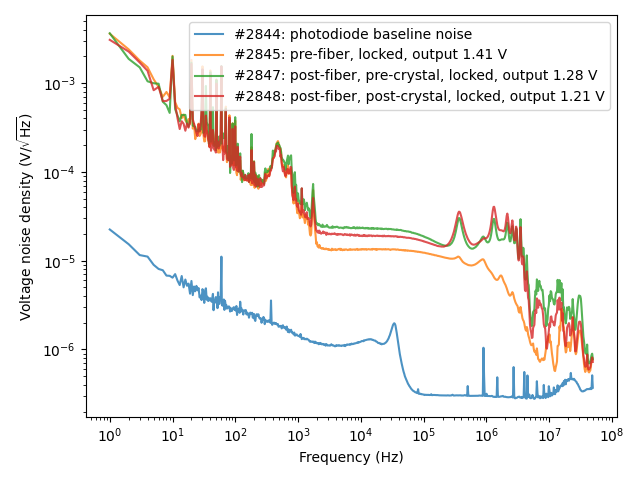

In [40]:
fig, ax = plt.subplots()

for number in data_numbers:
    if number != baseline_number:
        ax.plot(data[number][0]["f"], np.sqrt(data[number][0]["W_V1"]), label=f"#{number}: {labels[number]}", alpha=0.8)
    else:
        ax.plot(data[number][0]["f"], np.sqrt(data[number][0]["W_V1"]), label=f"#{number}: {labels[number]}", alpha=0.8)

ax.legend()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Voltage noise density (V/$\\sqrt{\\mathrm{Hz}}$)")
plt.tight_layout()
plt.show()

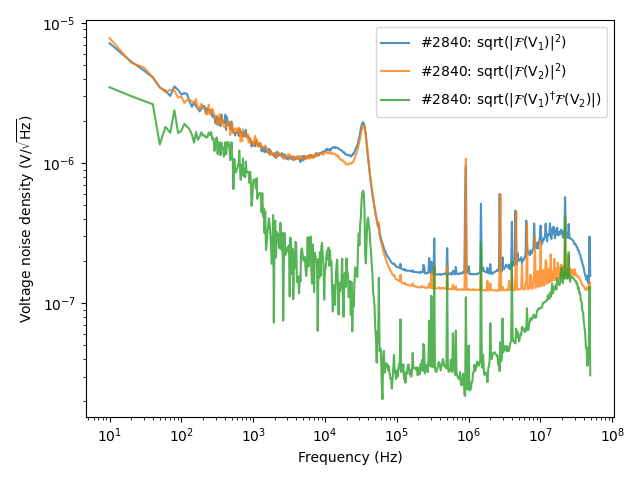

In [283]:
fig, ax = plt.subplots()
number = 2840

correlation_data = get_experiment_data(number)
ax.plot(correlation_data[0]["f"], np.sqrt(correlation_data[0]["W_V1"]), label=f"#{number}: " + "sqrt(|$\\mathcal{F}$(V$_1$)|$^2$)", alpha=0.8)
ax.plot(correlation_data[0]["f"], np.sqrt(correlation_data[0]["W_V2"]), label=f"#{number}: " + "sqrt(|$\\mathcal{F}$(V$_2$)|$^2$)", alpha=0.8)
ax.plot(correlation_data[0]["f"], np.sqrt(np.abs(correlation_data[0]["W_V_correlation"])), label=f"#{number}: "+ "sqrt(|$\\mathcal{F}$(V$_1$)$^\\dag\\mathcal{F}$(V$_2$)|)", alpha=0.8)
ax.legend()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Voltage noise density (V/$\\sqrt{\\mathrm{Hz}}$)")
plt.tight_layout()
plt.show()

In [ ]:

ax.plot(correlation_data[0]["f"], np.imag(correlation_data[0]["W_V_correlation"]), label="imaginary")

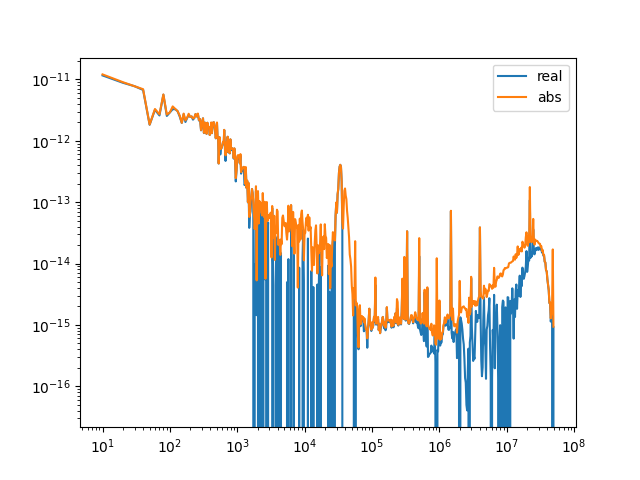

In [274]:
fig, ax = plt.subplots()
ax.plot(correlation_data[0]["f"], np.real(correlation_data[0]["W_V_correlation"]), label="real")
#ax.plot(correlation_data[0]["f"], np.imag(correlation_data[0]["W_V_correlation"]), label="imaginary")
ax.plot(correlation_data[0]["f"], np.abs(correlation_data[0]["W_V_correlation"]), label="abs")
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()
plt.show()